<a href="https://colab.research.google.com/github/EUNYUGNYU/krNLP_exmple_01/blob/main/SocialTextAnalysis_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SocialTextAnalysis Introduction
---
<br>

### 1강 범위

**텍스트 마이닝 개념 및 용어정리**

**텍스트 전처리**
 * 문장 분리
 * 형태소 분석
 * 사용자 사전 추가
 * 불용어 제거

---
*SocialTextAnalysis_class01_preprocessing.ipynb*
- e-mail: jomin8393@gmail.com


#### **텍스트 마이닝**

다량의 텍스트를 **수집**, **정제**하고 이로부터 원하는 **정보나 의미**를 읽어내는 것

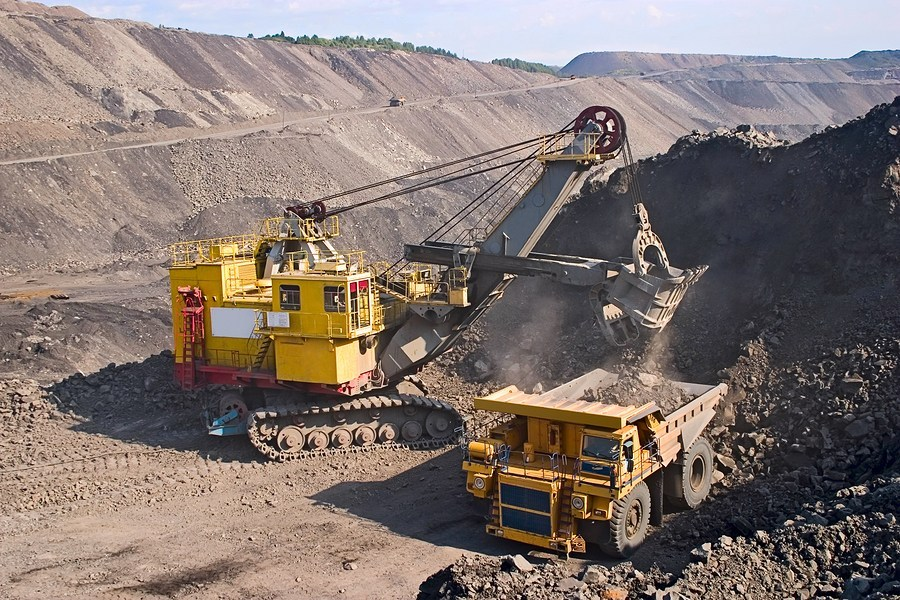

#### __용어정리__

- 텍스트 원자료는 일정한 단위로 구성되어있음
    - 게시물, 댓글, 기사, 멘션 ...
- 원자료는 더욱 세부적인 레벨로 쪼개어 분석할 수 있음
    - 문단, 문장, 단어 ...
- 분석목적에 따라 텍스트의 데이터의 단위를 조절해가며 사용해야함
- 범용적으로 사용되는 텍스트 데이터 단위의 명칭
    - __Corpus__ (말뭉치) : 특정한 목적에 따라 추출한 텍스트 표본의 집합
        - 한국어 신문기사 말뭉치, 네이버 영화리뷰 텍스트, 전기차관련 social media 게시물 집합
    - __Document__(문서): corpus 내의 개별 텍스트데이터의 단위
        - 기사1개, 영화리뷰 1개, intagram 게시물1개
    - __Paragraph__ (문단)
    - __Sentence__ (문장)
    - __word__ (단어)
    - __Token__: 토큰은 분석을 위해 분리되고 정제된 텍스트의 단위를 지칭함. 위의 분류가 고정적인 것에 비해 토큰의 단위는 분석에 따라 상이함.
        - 예시문장: “빙빙 돌아가는 회전목마 처럼 영원히 계속될것 처럼”
        - __Lemmatization(표제어추출) → 품사선택 → unigram 토크나이징 (기본적으로 우리가 생각하는 토큰화)__
            - 빙빙, 돌다, 회전목마, 영원히, 계속되다
        - __Lemmatization(표제어추출) → 품사선택 → bigram 토크나이징__
            - 빙빙_돌다, 돌다_회전목마, 회전목마_영원히, 영원히_계속되다
- 예시
    - “감성분석기를 사용하여, 각 영화리뷰마다 감성 점수를 도출하고 싶다”  
    → 리뷰 텍스트 단위 감성분석
    - “게시글 별로 게시글에 사용된 단어를 세어 게시글별 고빈도 어휘를 찾고싶다. 그러나 ‘한 문장’에서 여러번 언급되어도 1회로만 세고싶다.”  
    → 단어 카운트는 ‘게시글’별로 이루어지지만, 분석의도에 따라 데이터를 ‘문장’단위로 분리해놓아야함

## __Packages & Modules__

In [2]:
pip install kss # kss: 대표적인 한글 문장 토큰화 모듈

     |████████████████████████████████| 42.4 MB 1.1 MB/s 
     |████████████████████████████████| 170 kB 65.5 MB/s 
  Created wheel for kss: filename=kss-3.3.1.1-py3-none-any.whl size=42449239 sha256=3ef033228a0536979d0552e3305a9bf95b0fda1357cc23207ae30346cc8fa891
  Stored in directory: /root/.cache/pip/wheels/6e/9d/1d/52871154eff5273abb86b96f4f984c1cd67c5bde64239b060a
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=5876841622e2ca5ea3dc1f6c86e1fa0f9d3b4b58dc97a74b5520f2a70b9f7330
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built kss emoji


In [4]:
pip install konlpy # 대표적인 한국어 분석 모듈

     |████████████████████████████████| 19.4 MB 880 kB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 448 kB 39.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


**KoNLPy 형태소 분석기 종류**

다양한 종류가 있다.

일단은 Komoran(코모란)을 사용한다.

- Hannanum(한나눔) - KAIST 말뭉치를 이용해 생성된 사전 
- Kkma(꼬꼬마) - 세종 말뭉치를 이용해 생성된 사전 -> 정확한 품사 분류 
- Mecab(메캅) - 세종 말뭉치로 만들어진 CSV형태의 사전 -> 속도가 빠름
- ★ Komoran(코모란) - Java로 쓰여진 오픈소스 한글 형태소 분석기 -> 정확성과 속도
- ★ Twitter(Okt) - 오픈소스 한글 형태소 분석기 -> 빠른 분석. 기본적으로 트위터 데이터 등 SNS 데이터에서 성능이 좋음


In [2]:
import pandas as pd
from tqdm import tqdm
from kss import split_sentences
from konlpy.tag import Komoran

# konlpy 설치관련 참고:  https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/

tqdm.pandas()

## __Load Data__

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
my_data ='/content/drive/MyDrive/B2C 리뷰그룹/data/nsmc_ratings.txt'
review = pd.read_csv(my_data, sep='\t')

In [5]:
display(review.info())
display(review.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


None

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [6]:
review = review.dropna() #결측치 삭제

In [7]:
review.shape # 8개의 데이터가 삭제되서 총 199,992개 됨

(199992, 3)

## __Sentence Split__

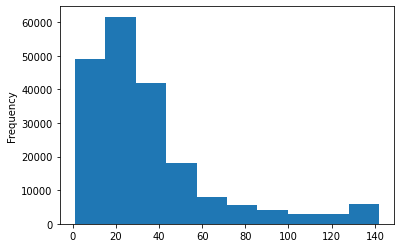

In [8]:
# document의 길이 분포 확인
review.document.str.len().plot(kind='hist')

In [9]:
# 문장분리 결과 확인에 적절한 긴 리뷰만 slice
# 20만 행 중 11,820개
review_long = review[review.document.str.len().ge(100)]
print(review_long.shape)

(11820, 3)


In [10]:
def printer(text_array):
    for text in text_array:
        print(text)
        print('-'*100)

In [11]:
# 문장분리 sample 문장 5개
printer(review_long.document[:5])

디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.
----------------------------------------------------------------------------------------------------
그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때. 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다.
----------------------------------------------------------------------------------------------------
7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다. 아름답고 슬픈 OST, 제니퍼코넬리의 눈부신 아역시절, 로버트드니로의 마지막 웃는 장면까지 정말 가슴속에 영원히 기억될 최고의 명작이다.
----------------------------------------------------------------------------------------------------
내가 남자라그런가 이거 겁나 긴장감있고 흥미진진하던데..ㄷㄷ 나만그런가워낙에 격투씬을 좋아해서.ㅋㅋㅋ 그냥 아무생각없이 집에서 스마트티비로 봐서 재밌었나봄 이거 뭔영화인지도 모르고 암살에 나온 이정재 있길래 걍봄 ㅋㅋ 하여튼 너무 재밌게 봤음
----------------------------------------------------------------------------------------------------
첫느낌은예전에양심냉장고와 비슷한거같더라고요 보면서 감정이움찔 해져요 그런대 한가지부탁 드리고싶은게연기자좀보호해주세요 욕이나폭력은 걱정되요 저어릴적에성추행을상가에서모든사람이목격했는데저

In [12]:
import re #정규 표현식을 지원하는 re 모듈

# 정규식으로 문장부호 기준 문장 분리하는 간단한 함수 정의
def simple_splitter(text):
    sentences = re.split('[.!?]', text)
    return sentences

sentences_custom = review_long.document.progress_map(simple_splitter) # progress_map : 진행사항 확인
printer(sentences_custom[:5])

100%|██████████| 11820/11820 [00:00<00:00, 182822.37it/s]

['디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데', ' 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다', '']
----------------------------------------------------------------------------------------------------
['그런 때가 있었다', " ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때", ' 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다', '']
----------------------------------------------------------------------------------------------------
['7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다', ' 아름답고 슬픈 OST, 제니퍼코넬리의 눈부신 아역시절, 로버트드니로의 마지막 웃는 장면까지 정말 가슴속에 영원히 기억될 최고의 명작이다', '']
----------------------------------------------------------------------------------------------------
['내가 남자라그런가 이거 겁나 긴장감있고 흥미진진하던데', '', 'ㄷㄷ 나만그런가워낙에 격투씬을 좋아해서', 'ㅋㅋㅋ 그냥 아무생각없이 집에서 스마트티비로 봐서 재밌었나봄 이거 뭔영화인지도 모르고 암살에 나온 이정재 있길래 걍봄 ㅋㅋ 하여튼 너무 재밌게 봤음']
----------------------------------------------------------------------------------------------------
['첫느낌은예전에양심냉장고와 비슷한거같더라고요 보면서 감정이움찔 해져요 그런대 한가지부탁 드리고싶은

In [26]:
from kss import split_sentences

# 한국어 문장분리 패키지를 사용
sentences_kss = review_long.document[:1000].progress_map(split_sentences) # 일단 1000개 진행. split_sentences시 5분정도 소요된다.
printer(sentences_kss[:5])

100%|██████████| 1000/1000 [04:15<00:00,  3.92it/s]

['디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데.', '사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.']
----------------------------------------------------------------------------------------------------
["그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때. 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다."]
----------------------------------------------------------------------------------------------------
['7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다.', '아름답고 슬픈 OST, 제니퍼코넬리의 눈부신 아역시절, 로버트드니로의 마지막 웃는 장면까지 정말 가슴속에 영원히 기억될 최고의 명작이다.']
----------------------------------------------------------------------------------------------------
['내가 남자라그런가 이거 겁나 긴장감있고 흥미진진하던데..ㄷㄷ', '나만그런가워낙에 격투씬을 좋아해서.ㅋㅋㅋ 그냥 아무생각없이 집에서 스마트티비로 봐서 재밌었나봄 이거 뭔영화인지도 모르고 암살에 나온 이정재 있길래 걍봄 ㅋㅋ 하여튼 너무 재밌게 봤음']
----------------------------------------------------------------------------------------------------
['첫느낌은예전에양심냉장고와 비슷한거같더라고요 보면서 감정이움찔 해져요', '그런대 한가지부탁 드리고싶은게연기자좀보호해주세요', '욕이나

In [13]:
corpus = review_long.copy()
corpus['sentences'] = corpus.document[:1000].progress_map(split_sentences) # 11820개 모두 진행하기 어려워서 일단 1000개만 진행. sentence 열에 넣는다. (11820개 모두 진행시 1시간 넘게 걸림)

100%|██████████| 1000/1000 [04:41<00:00,  3.55it/s]


In [14]:
corpus.head()

,id,document,label,sentences
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,"[디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화..."
21,10221267,그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 ...,1,[그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도...
25,10232169,"7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다. 아름답고 슬픈 OST, ...",1,"[7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다., 아름답고 슬픈 OST..."
45,10142929,내가 남자라그런가 이거 겁나 긴장감있고 흥미진진하던데..ㄷㄷ 나만그런가워낙에 격투씬...,1,"[내가 남자라그런가 이거 겁나 긴장감있고 흥미진진하던데..ㄷㄷ, 나만그런가워낙에 격..."
88,8418558,첫느낌은예전에양심냉장고와 비슷한거같더라고요 보면서 감정이움찔 해져요 그런대 한가지부...,1,"[첫느낌은예전에양심냉장고와 비슷한거같더라고요 보면서 감정이움찔 해져요, 그런대 한가..."


### __Pos Tagging__
- POS: Part of Speech, 품사
- 형태소: 의미를 갖는 최소단위
명사, 조사 등 => 한국어에서 쪼갤 수 있는 가장 작은 단위
- 텍스트를 형태소 단위로 쪼개어 품사를 태깅한 후, 원하는 품사만을 선택하기 위해 수행함

- 목적에 따라 다르겠지만 기본적으로 명사를 한국어에서 많이 추출. 행동, 행위를 고려해야 할 경우 동사를 추출

In [15]:
# 형태소 분석기 비교: https://konlpy.org/ko/v0.5.2/morph/
from konlpy.tag import Komoran

komoran = Komoran()

In [16]:
sample_stc = corpus.sentences.values[0][0]
sample_stc

'디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데.'

In [17]:
print(komoran.__doc__)

Wrapper for `KOMORAN <https://github.com/shin285/KOMORAN>`_.

    KOMORAN is a relatively new open source Korean morphological analyzer written in Java, developed by `Shineware <http://shineware.co.kr>`_, since 2013.

    .. code-block:: python

        >>> cat /tmp/dic.txt  # Place a file in a location of your choice
        코모란	NNP
        오픈소스	NNG
        바람과 함께 사라지다	NNP
        >>> from konlpy.tag import Komoran
        >>> komoran = Komoran(userdic='/tmp/dic.txt')
        >>> print(komoran.morphs(u'우왕 코모란도 오픈소스가 되었어요'))
        ['우왕', '코모란', '도', '오픈소스', '가', '되', '었', '어요']
        >>> print(komoran.nouns(u'오픈소스에 관심 많은 멋진 개발자님들!'))
        ['오픈소스', '관심', '개발자']
        >>> print(komoran.pos(u'혹시 바람과 함께 사라지다 봤어?'))
        [('혹시', 'MAG'), ('바람과 함께 사라지다', 'NNP'), ('보', 'VV'), ('았', 'EP'), ('어', 'EF'), ('?', 'SF')]

    :param jvmpath: The path of the JVM passed to :py:func:`.init_jvm`.
    :param userdic: The path to the user dictionary.

        This enables the user to enter cust

In [18]:
# morphs() method는 형태소 단위로 텍스트를 분리해줌

print(komoran.morphs(sample_stc))

['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일구', 'ㄴ', '전통', '을', '통하', '아', '발전', '하', '아', '가', '는', '문화', '산업', '이', '부럽', '었', '는데', '.']


In [19]:
# pos() method는 형태소 분리후, 형태소에 품사를 태그해줌 => 튜플 형태

print(komoran.pos(sample_stc))

[('디자인', 'NNG'), ('을', 'JKO'), ('배우', 'VV'), ('는', 'ETM'), ('학생', 'NNG'), ('으로', 'JKB'), (',', 'SP'), ('외국', 'NNP'), ('디자이너', 'NNP'), ('와', 'JC'), ('그', 'NP'), ('들', 'XSN'), ('이', 'JKS'), ('일구', 'VV'), ('ㄴ', 'ETM'), ('전통', 'NNG'), ('을', 'JKO'), ('통하', 'VV'), ('아', 'EC'), ('발전', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('가', 'VX'), ('는', 'ETM'), ('문화', 'NNG'), ('산업', 'NNG'), ('이', 'JKS'), ('부럽', 'VA'), ('었', 'EP'), ('는데', 'EF'), ('.', 'SF')]


In [20]:
# nouns() method는 형태소 분리하여, 명사에 해당하는 것만 리스트로 반환 => 명사만 뽑는 메소드도 제공해줌

print(komoran.nouns(sample_stc))

['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업']


In [21]:
# tagset 확인 (Komoran 형태소 분석기 품사표:  https://docs.komoran.kr/firststep/postypes.html)
print(komoran.tagset)

{'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ETM': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JKB': '부사격 조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JKV': '호격 조사', 'JX': '보조사', 'MAG': '일반 부사', 'MAJ': '접속 부사', 'MM': '관형사', 'NA': '분석불능범주', 'NF': '명사추정범주', 'NNB': '의존 명사', 'NNG': '일반 명사', 'NNP': '고유 명사', 'NP': '대명사', 'NR': '수사', 'NV': '용언추정범주', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SH': '한자', 'SL': '외국어', 'SN': '숫자', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'VA': '형용사', 'VCN': '부정 지정사', 'VCP': '긍정 지정사', 'VV': '동사', 'VX': '보조 용언', 'XPN': '체언 접두사', 'XR': '어근', 'XSA': '형용사 파생 접미사', 'XSN': '명사파생 접미사', 'XSV': '동사 파생 접미사'}


In [22]:
# 품사 필터링 예시
def pos_filter(pos_pattern, tagged_sentece):
    return [morph for morph, pos in tagged_sentece if re.match(pos_pattern, pos)]

pattern = 'NN*|VV|VA' # 명사 (NN이 고정이고 그 다음에 오는 알파벳으로 명사별 세분화가 됨), 동사, 형용사로 지정
tagged_sentece = komoran.pos(sample_stc)
print('필터링 전')
print(tagged_sentece)
print('-'*100)

# 명사, 동사, 형용사 필터링
print('필터링 후')
print(pos_filter(pattern, tagged_sentece))

필터링 전
[('디자인', 'NNG'), ('을', 'JKO'), ('배우', 'VV'), ('는', 'ETM'), ('학생', 'NNG'), ('으로', 'JKB'), (',', 'SP'), ('외국', 'NNP'), ('디자이너', 'NNP'), ('와', 'JC'), ('그', 'NP'), ('들', 'XSN'), ('이', 'JKS'), ('일구', 'VV'), ('ㄴ', 'ETM'), ('전통', 'NNG'), ('을', 'JKO'), ('통하', 'VV'), ('아', 'EC'), ('발전', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('가', 'VX'), ('는', 'ETM'), ('문화', 'NNG'), ('산업', 'NNG'), ('이', 'JKS'), ('부럽', 'VA'), ('었', 'EP'), ('는데', 'EF'), ('.', 'SF')]
----------------------------------------------------------------------------------------------------
필터링 후
['디자인', '배우', '학생', '외국', '디자이너', '그', '일구', '전통', '통하', '발전', '문화', '산업', '부럽']


### __사용자 사전 정의__
- 각 형태소 분석기에서 보유한 사전이 잡지 못하는 단어가 존재함. -> 빈도가 낮아서 추출되지 않을 수도 있지만 특수한 전문 단어처럼 중요한 단어지만 추출되지 않을 수도 있음. 즉, 형태소 분석기를 무엇을 쓰냐에 따라 결과의 질이 달라짐
- 때문에, 사전에는 없지만 분석에서 중요히 다루어야 할 단어이거나 붙어서 나와야하는 단어라면 사용자 사전에 추가하여 올바르게 분리되도록해야함

In [23]:
sample = '본 연구는 국내 최초의 공중보행로인 서울로 7017의 이용행태를 이용객이 자율적으로 서술한 블로그를 분석하여 이용현황을 파악하고, 서울로 7017의 이용행태 및 개선방안을 제시하는 것을 목적으로 하였다.'

# 파라미터 없이 형태소 분석기 정의
komoran = Komoran()

print(pos_filter('NN*|VV', komoran.pos(sample))) # 명사 또는 동사 추출

['보', '연구', '국내', '최초', '공중', '보행', '서울로', '이용', '행태', '이용객', '자율', '서술', '블로그', '분석', '이용', '현황', '파악', '서울로', '이용', '행태', '개선', '방안', '제시', '것', '목적', '하']


In [24]:
# 사용자 사진을 포함하여 형태소 분석기 클래스 정의
komoran_userdic = Komoran(userdic='/content/drive/MyDrive/B2C 리뷰그룹/data/mydic.txt')

print(pos_filter('NN*|VV', komoran_userdic.pos(sample)))

['보', '연구', '국내', '최초', '공중보행로', '서울로', '이용', '행태', '이용객', '자율', '서술', '블로그', '분석', '이용', '현황', '파악', '서울로', '이용', '행태', '개선', '방안', '제시', '것', '목적', '하']


### __불용어 제거__
- 불용어: stopwords. 분석에 포함시키지 않을 단어 (노이즈)
- 한국어는 품사 선택으로 어느정도 불용어 제거를 수행할 수 있음 => 명사, 형용사 등 필요한 것을 지정하니 조사 등이 사라짐
- 비정형 데이터의 특성상 형태소 분석기의 성능을 100% 신뢰할 수 없기 때문에, 필요에 따라 추가적으로 불용어 제거 작업을 해줌

In [25]:
with open('/content/drive/MyDrive/B2C 리뷰그룹/data/korean_stopwords.txt', encoding='utf-8') as fin:
    stopwords = fin.read().split('\n')
print(stopwords[:100])

stopwords = set(stopwords)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를', '들면', '예를', '들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수', '없다', '해서는', '안된다', '뿐만', '아니라', '만이', '아니다', '만은', '아니다', '막론하고', '관계없이', '그치지', '않다', '그러나', '그런데', '하지만', '든간에', '논하지', '않다', '따지지', '않다', '설사', '비록', '더라도', '아니면', '만', '못하다', '하는', '편이', '낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이', '외에', '이', '밖에', '하여야', '비로소', '한다면', '몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다', '하려고하다', '이리하여', '그리하여']


In [26]:
words_in = komoran.morphs(sample)
print('<불용어 제거 전>')
print(words_in)
print('-'*100)

words_out = [w for w in words_in if w not in stopwords]
print('<불용어 제거 후>')
print(words_out)
print('-'*100)

print('<제거된 단어>')
set(words_in).difference(words_out)

<불용어 제거 전>
['보', 'ㄴ', '연구', '는', '국내', '최초', '의', '공중', '보행', '로', '이', 'ㄴ', '서울로', '7017', '의', '이용', '행태', '를', '이용객', '이', '자율', '적', '으로', '서술', '하', 'ㄴ', '블로그', '를', '분석', '하', '아', '이용', '현황', '을', '파악', '하', '고', ',', '서울로', '7017', '의', '이용', '행태', '및', '개선', '방안', '을', '제시', '하', '는', '것', '을', '목적', '으로', '하', '았', '다', '.']
----------------------------------------------------------------------------------------------------
<불용어 제거 후>
['ㄴ', '연구', '는', '국내', '최초', '공중', '보행', 'ㄴ', '서울로', '7017', '이용', '행태', '이용객', '자율', '서술', 'ㄴ', '블로그', '분석', '이용', '현황', '파악', '고', ',', '서울로', '7017', '이용', '행태', '개선', '방안', '제시', '는', '목적', '았', '다', '.']
----------------------------------------------------------------------------------------------------
<제거된 단어>


{'것', '로', '를', '및', '보', '아', '으로', '을', '의', '이', '적', '하'}

- 주로 한 단어짜리가 많이 제거됨. 불용어 처리에는 특별한 모듈이나 기술이 필요한 것이 아님

- 여러 형태소 분석기를 시도해보는 것이 중요. 각 형태소 분석기마다 불능 범주를 count해서 어떤 형태소 분석기를 사용할지 결정하는 것이 좋음

### __다음 목차__
- ngram
- zipf's law (어느 정도로 의미있는 단어를 잘라야 할까?)
- Document Vectorization